In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

In [2]:
def get_data(filename):
    data = load_svmlight_file(filename,123)
    return data[0], data[1]

#Import data
X_train, y_train = get_data("a9a")
X_test, y_test = get_data("a9a.t")

#X_train = X_train.todense()
#y_train = y_train.reshape(y_train.shape[0],1)
#X_test = X_test.todense()
#y_test = y_test.reshape(y_test.shape[0],1)

## Logistic Regression

$LossFunction =\frac{1}{n}\sum_{i=1}^nlog(1+e^{-y_i\cdot w^TX_i}) $


In [3]:
def logisticRegressionSGD(delta,n,X_train,y_train,X_test,y_test,batchSize):
    #Initialize linear model parameters. Set all parameter into zero
    W = np.zeros(X_train.shape[1]) 
    trainCost = []
    testCost = []
    for i in range(n):
        trainCost.append(np.sum(np.log(np.exp(X_train.dot(W)*y_train*(-1))+1))/X_train.shape[0])
        x_batch=(X_train[i*batchSize:(i+1)*batchSize,:])
        y_batch=(y_train[i*batchSize:(i+1)*batchSize])
        W=W+delta*x_batch.T.dot(y_batch/(np.exp(x_batch.dot(W)*y_batch)+1))/batchSize
        
        testCost.append(np.sum(np.log(np.exp(X_test.dot(W)*y_test*(-1))+1))/X_test.shape[0])

    return trainCost,testCost

In [4]:
def logisticRegressionNAG(delta,n,X_train,y_train,X_test,y_test,batchSize):
    W=np.zeros(X_train.shape[1])
    trainCost=[]
    testCost=[]
    gama=0.9
    V=np.zeros(W.shape)
    
    for i in range(n):
        trainCost.append(np.sum(np.log(np.exp(X_train.dot(W)*y_train*(-1))+1))/X_train.shape[0])
        X_batch=(X_train[i*batchSize:(i+1)*batchSize,:])
        y_batch=(y_train[i*batchSize:(i+1)*batchSize])
        wforecast=W-gama*V
        g=(-1)*X_batch.T.dot(y_batch/(np.exp(X_batch.dot(wforecast)*y_batch)+1))/batchSize
        V=gama*V+delta*g
        W=W-V
        
        testCost.append(np.sum(np.log(np.exp(X_test.dot(W)*y_test*(-1))+1))/X_test.shape[0])
    return trainCost,testCost

In [5]:
def logisticRegressionRMSProp(delta,num_iters,x_train,y_train,x_test,y_test,batch_size):
    w=np.ones(x_train.shape[1])
    w=w/20
    trainCost=[]
    testCost= []
    epsilon=1/(10**8)
    gama=0.9
    G=np.zeros(w.shape)
    
    for i in range(num_iters):
        trainCost.append(np.sum(np.log(np.exp(x_train.dot(w)*y_train*(-1))+1))/x_train.shape[0])
        x_batch=(x_train[i*batch_size:(i+1)*batch_size,:])
        y_batch=(y_train[i*batch_size:(i+1)*batch_size])
        g=(-1)*x_batch.T.dot(y_batch/(np.exp(x_batch.dot(w)*y_batch)+1))/batch_size
        G=G*gama+(1-gama)*np.square(w)
        w=w-delta/(np.sqrt(G+epsilon))*w
        
        testCost.append(np.sum(np.log(np.exp(x_test.dot(w)*y_test*(-1))+1))/x_test.shape[0])
    return trainCost,testCost

In [6]:
def logisticRegressionAdaDelta(delta,num_iters,x_train,y_train,x_test,y_test,batch_size):
    w=np.ones(x_train.shape[1])
    w=w/20
    trainCost=[]
    testCost=[]
    epsilon=1/(10**8)
    gama=0.95
    G=np.zeros(w.shape)
    dt=np.zeros(w.shape)
    
    for i in range(num_iters):
        trainCost.append(np.sum(np.log(np.exp(x_train.dot(w)*y_train*(-1))+1))/x_train.shape[0])
        testCost.append(np.sum(np.log(np.exp(x_test.dot(w)*y_test*(-1))+1))/x_test.shape[0])
        x_batch=(x_train[i*batch_size:(i+1)*batch_size,:])
        y_batch=(y_train[i*batch_size:(i+1)*batch_size])
        
        g=(-1)*x_batch.T.dot(y_batch/(np.exp(x_batch.dot(w)*y_batch)+1))/batch_size
        G=G*gama+(1-gama)*np.square(g)
        dw=(-1)*np.sqrt(dt+epsilon)/np.sqrt(G+epsilon)*g
        w=w+dw
        dt=gama*dt+(1-gama)*dw*dw
    return trainCost,testCost

In [7]:
def logisticRegressionAdam(delta,num_iters,x_train,y_train,x_test,y_test,batch_size):
    w=np.ones(x_train.shape[1])
    w=w/20
    trainCost=[]
    testCost=[]
    epsilon=1/(10**8)
    gama=0.999
    beta=0.9
    delta=0.001
    m=np.zeros(w.shape)
    G=np.zeros(w.shape)
    
    for i in range(num_iters):
        trainCost.append(np.sum(np.log(np.exp(x_train.dot(w)*y_train*(-1))+1))/x_train.shape[0])
        testCost.append(np.sum(np.log(np.exp(x_test.dot(w)*y_test*(-1))+1))/x_test.shape[0])
        x_batch=(x_train[i*batch_size:(i+1)*batch_size,:])
        y_batch=(y_train[i*batch_size:(i+1)*batch_size])
        
        g=(-1)*x_batch.T.dot(y_batch/(np.exp(x_batch.dot(w)*y_batch)+1))/batch_size
        m=beta*m+(1-beta)*g
        G=G*gama+(1-gama)*np.square(g)
        #alpha=delta*np.sqrt(1-gama**i)/(1-beta**i)
        alpha=delta*np.sqrt(1-gama)/(1-beta)
        w=w-alpha*m/(np.sqrt(G+epsilon))
    return trainCost,testCost

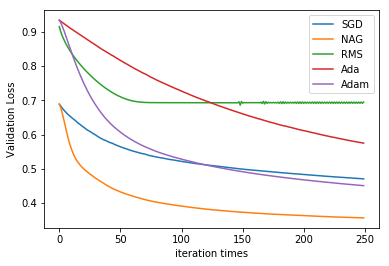

In [8]:
n = 250   #iteration time
delta = 0.01  #learning rate
batchSize = 130
tSGD,vSGD = logisticRegressionSGD(delta,n,X_train,y_train,X_test,y_test,batchSize)
tNAG,vNAG = logisticRegressionNAG(delta,n,X_train,y_train,X_test,y_test,batchSize)
tRMS,vRMS = logisticRegressionRMSProp(0.001,n,X_train,y_train,X_test,y_test,batchSize)
tAda,vAda = logisticRegressionAdaDelta(delta,n,X_train,y_train,X_test,y_test,batchSize)
tAdam,vAdam = logisticRegressionAdam(delta,n,X_train,y_train,X_test,y_test,batchSize)
plt.figure(1)
x = np.arange(0, n, 1)
plt.xlabel('iteration times')
plt.ylabel('Validation Loss')
plt.plot(x,vSGD,label = "SGD")
plt.plot(x,vNAG,label = "NAG")
plt.plot(x,vRMS,label = "RMS")
plt.plot(x,vAda,label = "Ada")
plt.plot(x,vAdam,label = "Adam")
plt.legend(loc='upper right')
plt.show()